# Tutorial 3: Làm việc với dữ liệu

> "Học Máy (Machine Learning) là một lĩnh vực nghiên cứu và xây dựng các giải thuật có khả năng học tự động từ dữ liệu để giải quyết các vấn đề cụ thể". Từ đó có thể thấy, dữ liệu (data) đóng một vai trò cực kì quan trọng và là yếu tố đầu tiên cần có khi thực hiện một ứng dụng Machine Learning.

*Trong bài thực hành ngay hôm nay, chúng ta sẽ cùng tìm hiểu một số khái niệm và kĩ thuật căn bản khi làm việc với các loại dữ liệu.*


### Mục tiểu buổi học
- Tìm hiểu các kiểu dữ liệu cơ bản trong Machine Learning
- Làm việc với dữ liệu bảng, hình ảnh và văn bản trên Python
- Giới thiệu một số phương pháp lưu trữ dữ liệu 

### Nội dung 
1 - Dữ liệu có cấu trúc

2 - Dữ liệu không có cấu trúc
- Dữ liệu hình ảnh
- Dữ liệu văn bản

3 - Lưu trữ dữ liệu (Đọc thêm)


## 0.1 Kết nối và lấy dữ liệu trong Google Drive 

Để kết nối với Google Drive, có thể dùng lệnh 
```
from google.colab import drive
drive.mount('/content/drive')
```
Hoặc chọn vào biểu tượng `File` góc phía bên trái chọn `Mount Drive` khi đó Google Colab sẽ tự tạo kết nối tới Google Drive.

![alt text](https://imgur.com/ElUvFGW.png)
<!-- [link text](https://imgur.com/ElUvFGW.png) -->

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!ls 

data	  drivefs_ipc.0        img	__MACOSX
data.zip  drivefs_ipc.0_shell  img.zip	tmp7nw676f1


Sau đó, di chuyển đến folder chứa dữ liệu bằng lệnh `%cd`
```
Ví dụ 
%cd "/content/drive/My Drive/0. VietAI 6/3. Tutorial - Basic Data Manipulation/data"
```

## 0.2 Lấy dữ liệu từ Dropbox 

In [52]:
!wget --no-check-certificate \
https://www.dropbox.com/s/u0hqc80blztudkn/data.zip \
-O /tmp/data.zip

!wget --no-check-certificate \
https://www.dropbox.com/s/nx366jyvv1x4ydn/img.zip \
-O /tmp/img.zip

--2020-05-28 02:25:24--  https://www.dropbox.com/s/u0hqc80blztudkn/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u0hqc80blztudkn/data.zip [following]
--2020-05-28 02:25:24--  https://www.dropbox.com/s/raw/u0hqc80blztudkn/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1cad7531de30ab6997e13e6c56.dl.dropboxusercontent.com/cd/0/inline/A4g3k-BpBBraPXnkhV3bUd5b2H8wX3qPY9Awi862INJwKwyLwgPuGIHpPtNKdlKV-PjELiXkmWNob_nrBRCPaiYonG-Eaq4YObIIAKIDnmC0NcKL6a-0RtgcznxJrchGj38/file# [following]
--2020-05-28 02:25:25--  https://uc1cad7531de30ab6997e13e6c56.dl.dropboxusercontent.com/cd/0/inline/A4g3k-BpBBraPXnkhV3bUd5b2H8wX3qPY9Awi862INJwKwyLwgPuGIHpPtNKdlKV-PjELiXkmWNob_nrBRCPaiYonG-Eaq4YObIIAKIDnmC0NcKL6a-0Rtgcznx

Giải nén file được tải xuống bên trên 

In [0]:
import os
import zipfile

local_zip = '/tmp/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

local_zip = '/tmp/img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

Trong Machine Learning, dữ liệu được chia thành 2 nhóm chính, là **dữ liệu có cấu trúc** (Structured Data) và **dữ liệu không có cấu trúc** (Unstructured Data).
## 1. Dữ liệu có cấu trúc
- Dữ liệu thường biểu diễn ở dạng bảng
- Mỗi hàng biểu diễn một **điểm dữ liệu (instance)**
- Các cột là các **đặc trưng (features)** và **nhãn (label)** của dữ liệu đó
- Một cách thường dùng để lưu trữ dữ liệu có cấu trúc là lưu trữ ở dạng file **.csv** <sup>(1)</sup>

Ví dụ: Iris Dataset

<img src = "https://imgur.com/SyhcVvY.jpg" width="500px"/>

<sup> 1 </sup> **csv** (comma-separated values) là một định dạng file thông dụng để lưu trữ dữ liệu dạng bảng. Mỗi dòng trong file tương ứng với một hàng, dữ liệu trong một dòng mặc định được phân cách bằng dấu **phẩy**, hoặc các kí tự khác được tự định nghĩa (khoảng cách, tab, etc.)

In [54]:
# Di chuyển đến thư mục chứa dữ liệu 
%cd "/tmp"

/tmp


In [55]:
# Có thể sử dụng thư viện hỗ trợ đọc file csv trong Python
# Hoặc tiến hành đọc file như file text thông thường
import csv

with open('data/iris.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in list(reader)[::20]:
        print(row)
        

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
['5.1', '3.8', '1.5', '0.3', 'setosa']
['5.1', '3.4', '1.5', '0.2', 'setosa']
['5.2', '2.7', '3.9', '1.4', 'versicolor']
['5.7', '2.6', '3.5', '1.0', 'versicolor']
['5.7', '2.8', '4.1', '1.3', 'versicolor']
['6.0', '2.2', '5.0', '1.5', 'virginica']
['6.9', '3.1', '5.4', '2.1', 'virginica']


Để dễ dàng trong phân tích và xử lý các dữ liệu dạng bảng trên Python, một công cụ thường được sử dụng là **Pandas**

In [56]:
import pandas as pd
dataset = pd.read_csv('data/iris.csv')

# Lấy ra 5 mẫu ngẫu nhiên 
print(dataset.sample(5))

     sepal_length  sepal_width  petal_length  petal_width     species
29            4.7          3.2           1.6          0.2      setosa
105           7.6          3.0           6.6          2.1   virginica
111           6.4          2.7           5.3          1.9   virginica
65            6.7          3.1           4.4          1.4  versicolor
94            5.6          2.7           4.2          1.3  versicolor


In [57]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


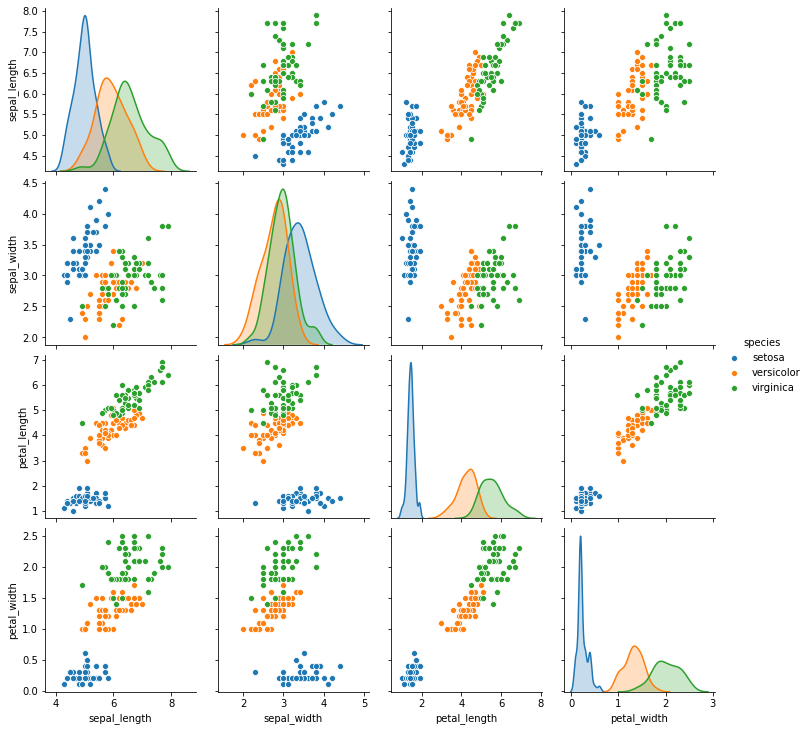

In [58]:
import seaborn as sns
sns.pairplot(dataset.iloc[:,0:5],hue="species")

Một số kĩ thuật tiền xử lý dữ liệu có cấu trúc: 

- Xử lý dữ liệu bị mất (missing data)
- Chuẩn hóa dữ liệu (normalization) 
- Rời rạc hóa dữ liệu (discretization)
- Phát hiện và xử lý dữ liệu ngoại lai (outlier)

Readmore: [Feature-Normalization](https://nbviewer.jupyter.org/github/thanhhff/AIVN-Machine-Learning/blob/master/Week%203/Feature-Normalization.ipynb)


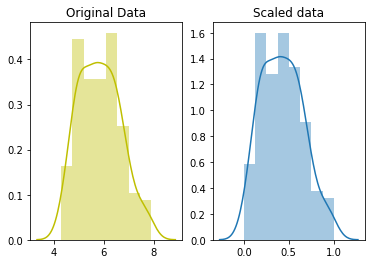

In [59]:
### Rescaling Data: Max-min scaling - đưa các Future về đoạn [0;1] 

import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# Dữ liệu sepal_length 
original_data = dataset.iloc[:,0].values

# dữ dữ liệu về đoạn [0;1]
scaled_data = minmax_scale(original_data)

# vẽ 2 đồ thị giữ liệu ban đầu và sau khi Scaling 
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

## 2. Dữ liệu không có cấu trúc
Các loại dữ liệu không có cấu trúc thường gặp:
- Dữ liệu văn bản (text)
- Dữ liệu hình ảnh (image)
- Dữ liệu âm thanh (audio)
- Dữ liệu chuỗi thời gian (time series)
- etc.

Đối với các dữ liệu không có cấu trúc, cần có các phương pháp khác nhau để chuyển đổi dữ liệu thô (raw data) thành dạng vector đặc trưng (feature vector) trước khi áp dụng các giải thuật Machine Learning.

### 2.1 Dữ liệu hình ảnh

#### a. Vector đặc trưng của ảnh
- Hình ảnh được lưu trữ trong máy tính dưới dạng ma trận số, các số này thể hiện thông tin về màu sắc của các pixel trong ảnh. 
- Đối với định dạng ảnh RGB: kích thước ma trận gồm chiều dài, chiều rộng và chiều sâu, giá trị mỗi số trong ma trận nằm trong phạm vi [0-255] và thể hiện độ sáng của pixel.


shape = (720, 1280, 3)
[[  1   1   1 ...   0   0   0]
 [191 191 191 ... 185 184 183]
 [189 189 189 ... 183 181 180]
 ...
 [ 93  93  93 ...  84  84  84]
 [ 94  94  94 ...  83  83  83]
 [  4   4   4 ...   5   5   5]]


Sử dụng thư viện Matplotlib để hiển thị ảnh: 



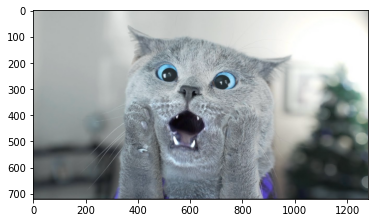

In [60]:
# Ví dụ sử dụng thư viện Open-CV cho xử lý ảnh trong Python
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
import cv2
image = cv2.imread("img/cat.jpg")

print("shape =", image.shape)
print(image[:, :, 2])

# Sử dụng thư viện Matplotlib để hiển thị ảnh trong Python
# https://matplotlib.org/
print("\n\nSử dụng thư viện Matplotlib để hiển thị ảnh: \n")
%matplotlib inline
from matplotlib import pyplot as plt
plt.subplots()
plt.imshow(image)

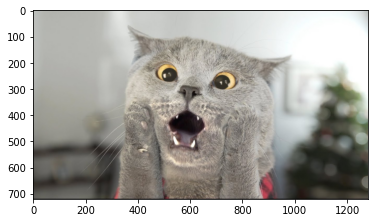

In [61]:
# CHÚ Ý: opencv đọc ảnh vào theo thứ tự BGR nên màu của ảnh bị "ngược" khi hiển thị ra
# Chỉ cần đảo lại thứ tự của chiều channel để lấy lại thứ tự RGB nếu bạn muốn
image = image[:, :, ::-1]
plt.imshow(image)

#### b. Một số kỹ thuật tiền xử lý ảnh
- Khi làm việc với dữ liệu ảnh trong Machine Learning/Deep Learning, kích thước của ảnh thường là cố định. Cần thay đổi kích thước ảnh đầu vào (resize hoặc crop ảnh)

shape = (25, 25, 3)
[[184 175 175 176 178 193 229 202 204 201 196 197 204 207 214 222 227 234
  240 246 250 253 254 251 224]
 [184 176 177 177 178 195 225 203 202 201 196 198 205 207 216 222 228 234
  241 250 255 253 254 254 241]
 [184 177 177 178 180 196 221 166 200 201 197 200 205 209 216 223 229 237
  247 253 254 255 255 255 255]
 [183 177 177 178 179 195 214 175 180 204 195 174 205 209 216 219 230 238
  249 255 255 255 255 255 255]
 [183 177 177 178 179 186 207 209 117 143 139 156 172 167 219 223 230 239
  250 253 255 255 255 255 255]
 [183 177 177 178 178 182 206 212 131 144 123 171 188 184 162 202 229 237
  250 254 255 255 255 255 255]
 [181 175 176 177 178 190 199 187 183 137 173 177 178 166 148 173 126 178
  170 250 255 255 255 255 255]
 [177 173 174 176 178 193 186 187 116  79  81 187 197 141 129 111 123 120
  182 226 245 250 241 252 255]
 [174 171 172 173 177 190 181 192 180 123  42 178 178 208 121 138 186 121
  210 234 235 215 199 239 255]
 [170 169 169 171 173 187 178 189 1

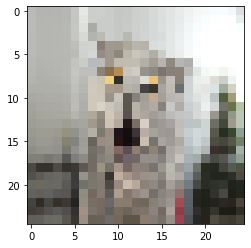

In [62]:
# Thay đổi kích thước ảnh
resized_image = cv2.resize(image, (25, 25)) 
print("shape =", resized_image.shape)
print(resized_image[:, :, 2])

plt.subplots()
plt.imshow(resized_image)

- Khi không quan tâm đến màu sắc của ảnh, có thể chuyển ảnh thành dạng ảnh xám (greyscale), lúc này, kích thước của ma trận chỉ gồm 2 giá trị là chiều dài và chiều rộng ảnh.

shape = (720, 1280)
[[  2   2   2 ...   1   1   1]
 [192 192 192 ... 188 187 186]
 [190 190 190 ... 186 184 183]
 ...
 [ 91  91  91 ...  78  78  78]
 [ 92  92  92 ...  77  77  77]
 [  2   2   2 ...   1   1   1]]


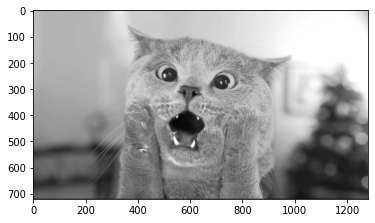

In [63]:
# Chuyển sang ảnh xám
greyscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print ("shape =", greyscale_image.shape)
print (greyscale_image[:, :])

plt.subplots()
plt.imshow(greyscale_image,cmap = 'gray')

- Để làm giàu cho tập dữ liệu (data augmentation), có thể sử dụng một số kỹ thuật như lật ảnh, xoay ảnh, hay dùng cách lớp mặt nạ (mask) để tạo ra các điểm dữ liệu mới.

([], <a list of 0 Text major ticklabel objects>)

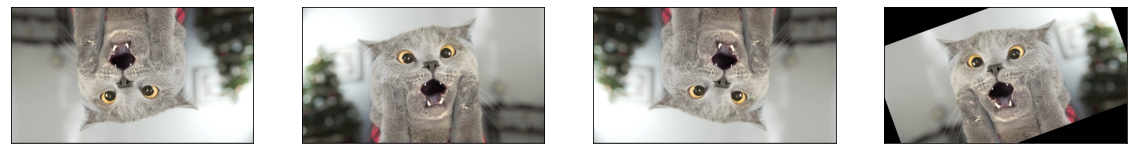

In [64]:
import numpy as np
plt.subplots(figsize=(20, 10))

# Lật ảnh
horizontal_img = cv2.flip(image, 0 )
plt.subplot(141),plt.imshow(horizontal_img)
plt.xticks([])
plt.yticks([])

vertical_img = cv2.flip(image, 1 )
plt.subplot(142),plt.imshow(vertical_img)
plt.xticks([])
plt.yticks([])


both_img = cv2.flip(image, -1 )
plt.subplot(143),plt.imshow(both_img)
plt.xticks([])
plt.yticks([])

# Xoay ảnh
angle = 20
image_center = tuple(np.array(image.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
rot_img = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.subplot(144),plt.imshow(rot_img)
plt.xticks([])
plt.yticks([])

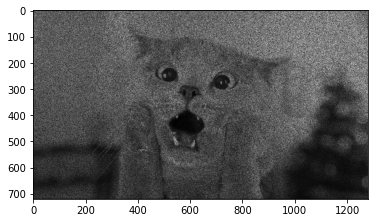

In [65]:
# Với "Mask" là một ma trận cho trước 
# Sử dụng phép nhân hadamard để áp dụng lớp "Mask" lên hình ảnh

mask = np.random.random(greyscale_image.shape[:2])
masked_image = mask * greyscale_image

plt.subplots()
plt.imshow(masked_image,cmap = 'gray')

### Đọc thêm 
Thư viện TensorFlow có hỗ trợ tự động tạo các kỹ thuật trên để mở rộng bộ dữ liệu: 
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

```
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)
```

### 2.2 Dữ liệu văn bản 

Mục đích của tiền xử lý dữ liệu văn bản là chuyển đổi các từ/kí tự trong văn bản thành các vector thể hiện đặc trưng của văn bản.

Các phương pháp tiền xử lý văn bản thường gặp:

#### a. Tokenization
Là quá trình phân tách văn bản thành các từ.

In [0]:
sample_text = "I am writing a sample text."

In [67]:
tokenized_text = sample_text.split()
print(tokenized_text)

['I', 'am', 'writing', 'a', 'sample', 'text.']


In [68]:
# Sử dụng thư viện nltk để hỗ trợ xử lý dữ liệu text
# https://www.nltk.org/

import nltk

"""
Chú ý: Tải package phụ trợ nếu chưa có
"""
nltk.download('punkt')  

tokenized_text = nltk.word_tokenize(sample_text)
print(tokenized_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['I', 'am', 'writing', 'a', 'sample', 'text', '.']


#### b. Loại bỏ Stopword: 
Stopword là các từ phổ biến trong ngôn ngữ và không mang ý nghĩa đặc trưng. Đối với các bài toán về phân loại văn bản, các stopword này sẽ được loại bỏ để giảm kích thước tập từ vựng (vocabulary) cũng như hạn chế nhiễu.

In [69]:
from nltk.corpus import stopwords

"""
Chú ý: Tải package phụ trợ nếu chưa có
"""
nltk.download('stopwords') 

english_stopword = stopwords.words('english')
print(english_stopword[::5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'our', "you've", 'yourself', 'himself', 'herself', 'they', 'what', 'that', 'is', 'been', 'having', 'a', 'if', 'while', 'with', 'through', 'below', 'in', 'under', 'here', 'how', 'few', 'such', 'own', 'very', 'just', 'now', 're', "aren't", 'doesn', "hasn't", 'ma', 'needn', "shouldn't", 'won']


#### c. Stemming
Với một số ngôn ngữ như tiếng anh, từ vựng thường được biến đổi về hình thức do quy tắc về ngữ pháp. Đối với các bài toán chỉ quan tâm đến ngữ nghĩa của từ mà bỏ qua cấu trúc ngữ pháp, người ta thường dùng kỹ thuật stemming để đưa các từ về dạng gốc (cats -> cat, playing -> play).

In [70]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stemmed_text = [ps.stem(word) for word in tokenized_text]
print(stemmed_text)

['I', 'am', 'write', 'a', 'sampl', 'text', '.']


#### d. Xác định tập từ vựng (vocabulary)
Đối với các bài toán về dữ liệu văn bản, cần xác định một tập từ vựng cố định, là các đặc trưng của văn bản. 

Tập từ vựng thường là tập hợp các từ xuất hiện trong tập dữ liệu huấn luyện, sau khi đã qua các bước như loại bỏ stopword, stemming, etc. Ngoài ra, để giới hạn kích thước tập từ vựng, ta cũng có thể loại bỏ các từ có tần xuất suất hiện quá thấp (các từ hiếm, nhiễu) hay quá phổ biến (các từ không mang nhiều ý nghĩa phân loại) trong toàn tập dữ liệu huấn luyện.

Có thể sử dụng 1 phần từ **< UNK >** (Unknown word) để biểu diễn cho các từ không xuất hiện trong tập từ vựng.


In [71]:
sample_texts = [
    "I am playing with text",
    "It is a cat",
    "I like cat"
]

sample_texts = [nltk.word_tokenize(text) for text in sample_texts]
vocab = set(sum(sample_texts, []))
print(vocab)

{'with', 'am', 'I', 'playing', 'is', 'cat', 'like', 'a', 'It', 'text'}


#### e. Chuyển văn bản về dạng vector đặc trưng (Word to Vectors)

Nội dung phần này sẽ được giảng chi tiết trong "Bài 11: Deep Learning trong lĩnh vực xử lý ngôn ngữ tự nhiên (NLP)".

In [72]:
# CHÚ Ý: cần tạo index cho @UNKNOWN@ - từ/token không có trong từ điển\
vocab = set(sum(sample_texts, []))
word2index = {'@UNKNOWN@': 0}
index2word = {0: '@UNKNOWN@'}

for i, word in enumerate(vocab):

    # word2index : key   - từ thuộc vocab 
    #               value - chỉ số của từ trong vocab
    #               {'am': 0, 'I': 1, 'with': 2, ... } 
    # index2word : key   - chỉ số của từ trong vocab
    #               value - từ thuộc vocab 
    #               {0: 'am', 1: 'I', 2: 'with', ... }
    #
    word2index[word] = i+1
    index2word[i+1] = word
    
print(word2index)
print(index2word)

{'@UNKNOWN@': 0, 'with': 1, 'am': 2, 'I': 3, 'playing': 4, 'is': 5, 'cat': 6, 'like': 7, 'a': 8, 'It': 9, 'text': 10}
{0: '@UNKNOWN@', 1: 'with', 2: 'am', 3: 'I', 4: 'playing', 5: 'is', 6: 'cat', 7: 'like', 8: 'a', 9: 'It', 10: 'text'}


##### **Biểu diễn One-hot Vector**

One-hot vector là vector có tất cả các giá trị bằng 0 và một giá trị duy nhất bằng 1. Vị trí có giá trị bằng 1 chính là giá trị integer mà vector đó biểu diễn. 

One-hot vector thường đường sử dụng để biểu diễn các biến kiểu phân loại (categorical variable) như các nhãn (label) của bài toán phân loại (classification). Trong các bài toán trên dữ liệu văn bản, One-hot vector cũng được sử đụng để biểu diễn các từ, thay cho giá trị index được biểu diễn ở trên.

```Python
        Ex: index_vector = [9, 7, 6, 2, 9, 7] 
        vocab = ['I', 'am', 'write', 'a', 'sampl', 'text', '.']
        onehot_vectors = [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
                          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
                          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
                          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
                          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
                          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]
```

## 3. Lưu trữ dữ liệu
Trong quá trình huấn luyện mô hình, tiền xử lý dữ liệu là một bước làm tốn nhiều thời gian và bộ nhớ. Vì vậy thông thường, ta sẽ xử lý các dữ liệu thô (raw data), chuyển thành dạng vector đặc trưng và lưu trữ các vector này dưới dạng nhị phân để thuận tiện trong việc lưu trữ và sử dụng.


#### Python Pickle
- Cho phép lưu trữ các cấu trúc dữ liệu trong Python dưới dạng file nhị phân.
- Các thao tác làm việc vói Pickle đơn giản và nhanh chóng

- Lưu trữ file ở dạng Pickle gặp phải một số hạn chế về kích thước không gian lưu trữ tốc độ truy xuất dữ liệu khi làm việc với dữ liệu lớn 

READMORE: https://docs.python.org/3/library/pickle.html

#### HDF5
- Định dạng HDF5 được sử dụng để lưu trữ dữ liệu lớn dưới dạng file nhị phân
- Dữ liệu được lưu trữ dưới dạng cấu trúc phân cấp (hierarchical structure)
- Dễ dàng lưu trữ và làm việc với dữ liệu số, dữ liệu Numpy

READMORE: http://docs.h5py.org/en/stable/